# Analysis of unstructured data

### Marcin Jakubwski, Dominika Struzik

## ASSIGNMENT 6

In [40]:
from nltk.tokenize import RegexpTokenizer,word_tokenize,sent_tokenize
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import numpy as np
import spacy
from spacy import displacy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import pandas as pd
import re
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk import pos_tag
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from nltk.corpus import sentiwordnet as swn

In [2]:
plt.rcParams['figure.figsize'] = [15, 6]  # changing parameters for presented plots
font = {'family' : 'DejaVu Sans',
        #'weight' : 'bold',
        'size'   : 10}

plt.rc('font', **font)

In [3]:
file = open("winnie_the_pooh.txt")
book = file.read()
file.close()

In [4]:
Tokenizer = RegexpTokenizer(r"[A-Za-z0-9-]+")
separated_book = Tokenizer.tokenize(book)

In [5]:
stopwords = stopwords.words("english")

In [6]:
separated_book_cleaned = [word for word in separated_book if word.lower() not in stopwords]

In [7]:
separator = ' '
book_cleaned = separator.join(separated_book_cleaned)

In [8]:
len(separated_book_cleaned)

10467

We have assumed that there are around 200 words per page  - without stopwords.

In [9]:
pages = []
i = 200
separator = ' '
condition = True
max_len = len(separated_book_cleaned)

while condition:
    if i <= max_len:
        pages.append(separator.join(separated_book_cleaned[i-200:i]))
    else:
        pages.append(separator.join(separated_book_cleaned[i-200:]))
        condition = False
    i += 200

In [10]:
len(pages)

53

Let us checkhow many the main character of the book ismention pereach page - *Winnie the Pooh*

In [11]:
NER = spacy.load("en_core_web_sm")

In [12]:
book_cleaned2 = NER(book)
characters = []
for word in book_cleaned2.ents:
    if word.label_ == 'PERSON':
        characters.append(word.text)
        #print(word.text,word.label_)  

In [13]:
characters = list(set(characters))

In [14]:
characters

['PooH',
 'Winnie-The-Pooh - Chapter',
 'Christopher Robin\n',
 'Zoo',
 'Bear Pooh',
 'Edward Bear',
 'the Queen Bee',
 'Wild Woozles',
 'Alexander Beetle',
 'Ist Mate',
 'Tail',
 'Baby Roo',
 'Cottleston Pie',
 'Rhododendron',
 'Nuts',
 'Ho',
 'a Loud Noise Until',
 'Climbing Trees',
 'Piglet',
 'Trespassers W',
 'Henry Pootel Piglet',
 'Trespassers William',
 'Pooh Bear',
 'Helping Bear',
 "Christopher Robin's",
 'Buzz',
 'CHRISTOPHER ROBIN',
 'bush',
 'A. A. M.',
 'Wobbles',
 'Winnie-the-Pooh',
 'C. Robin',
 'Roo',
 'Kanga',
 'Cunning Trap',
 'William',
 'F.O.P.',
 'a Long Start',
 'Christopher Robin',
 'Robin',
 'Woozles',
 'Pooh You',
 'a Cunning Trap',
 'Loud Sounds',
 'Christopher',
 'Escape',
 'mulberry bush',
 'Wizzles',
 'Heffalumps',
 'Grandfather T. W.',
 'Without Pooh',
 'Eeyore',
 'Henry Pootel',
 'Little Piglet',
 'mulberry bush\n',
 'Pooh',
 'Sing Ho',
 'Acre Wood']

In [15]:
char_per_page = dict()
characters = ['Pooh', 'Christopher', 'Piglet', 'Tigger', 'Eeyore', 'Rabbit', 'Roo', 'Kanga', 'Owl']
for char in characters:
    char_mentions = []
    for page in pages:
        char_mentions.append(page.count(char))
    char_per_page[char] = char_mentions

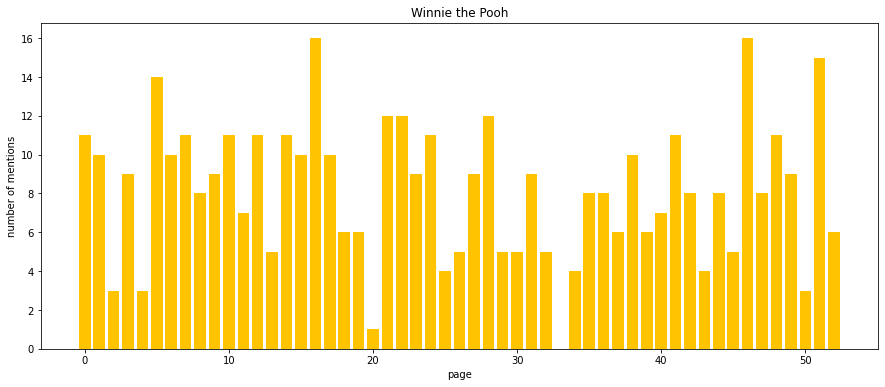

In [16]:
figsize=(20,15)
x = np.arange(len(char_per_page['Pooh']))

plt.xlabel('page')
plt.ylabel('number of mentions')
plt.title('Winnie the Pooh')
plt.bar(x, char_per_page['Pooh'],color='#FFC300')
plt.show()

Let us check also the occurence of Pooh's best friends.

In [17]:
for name in char_per_page:
    print(str(name)+': '+str(max(char_per_page[name])))

Pooh: 16
Christopher: 10
Piglet: 15
Tigger: 0
Eeyore: 16
Rabbit: 13
Roo: 11
Kanga: 12
Owl: 11


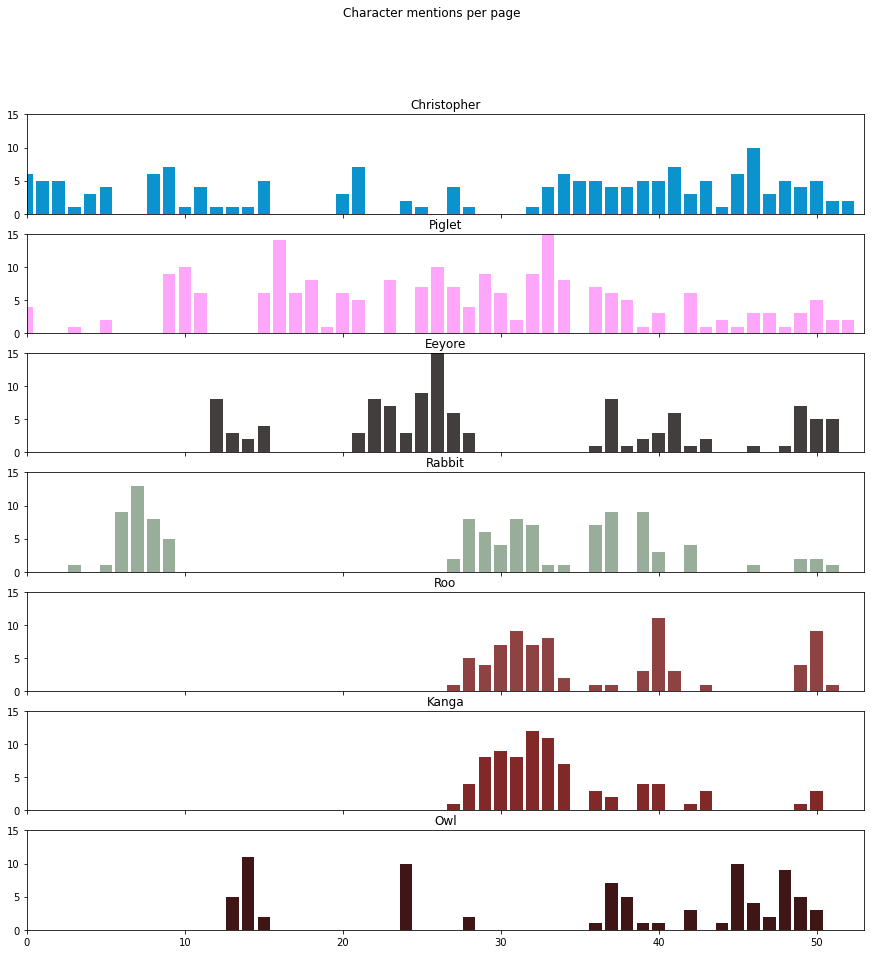

In [18]:
fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7) = plt.subplots(7, 1, sharex=True, figsize=(15,15))

x = np.arange(len(char_per_page['Pooh']))
limits = [0, 53, 0, 15]

ax1.set_title('Christopher')
ax1.axis(limits)
ax1.bar(x, char_per_page['Christopher'],color='#0B93CE')

ax2.set_title('Piglet')
ax2.axis(limits)
ax2.bar(x, char_per_page['Piglet'],color='#FEA6FA')

ax3.set_title('Eeyore')
ax3.axis(limits)
ax3.bar(x, char_per_page['Eeyore'],color='#423E3E')

ax4.set_title('Rabbit')
ax4.axis(limits)
ax4.bar(x, char_per_page['Rabbit'],color='#98AE9B')

ax5.set_title('Roo')
ax5.axis(limits)
ax5.bar(x, char_per_page['Roo'],color='#8E4242')

ax6.set_title('Kanga')
ax6.axis(limits)
ax6.bar(x, char_per_page['Kanga'],color='#812929')

ax7.set_title('Owl')
ax7.axis(limits)
ax7.bar(x, char_per_page['Owl'],color='#401515')

plt.suptitle('Character mentions per page')
plt.savefig('character_mentions_per_page.png')
plt.show()

Now we want to check how often the main characters are mentionedin each chapter.

In [19]:
separator = 'Chapter'
chapters = book_cleaned.split(separator)
chapters = chapters[1:]

In [20]:
char_per_chapter = dict()

for char in characters:
    char_mentions = []
    for chapter in chapters:
        char_mentions.append(chapter.count(char))
    char_per_chapter[char] = char_mentions

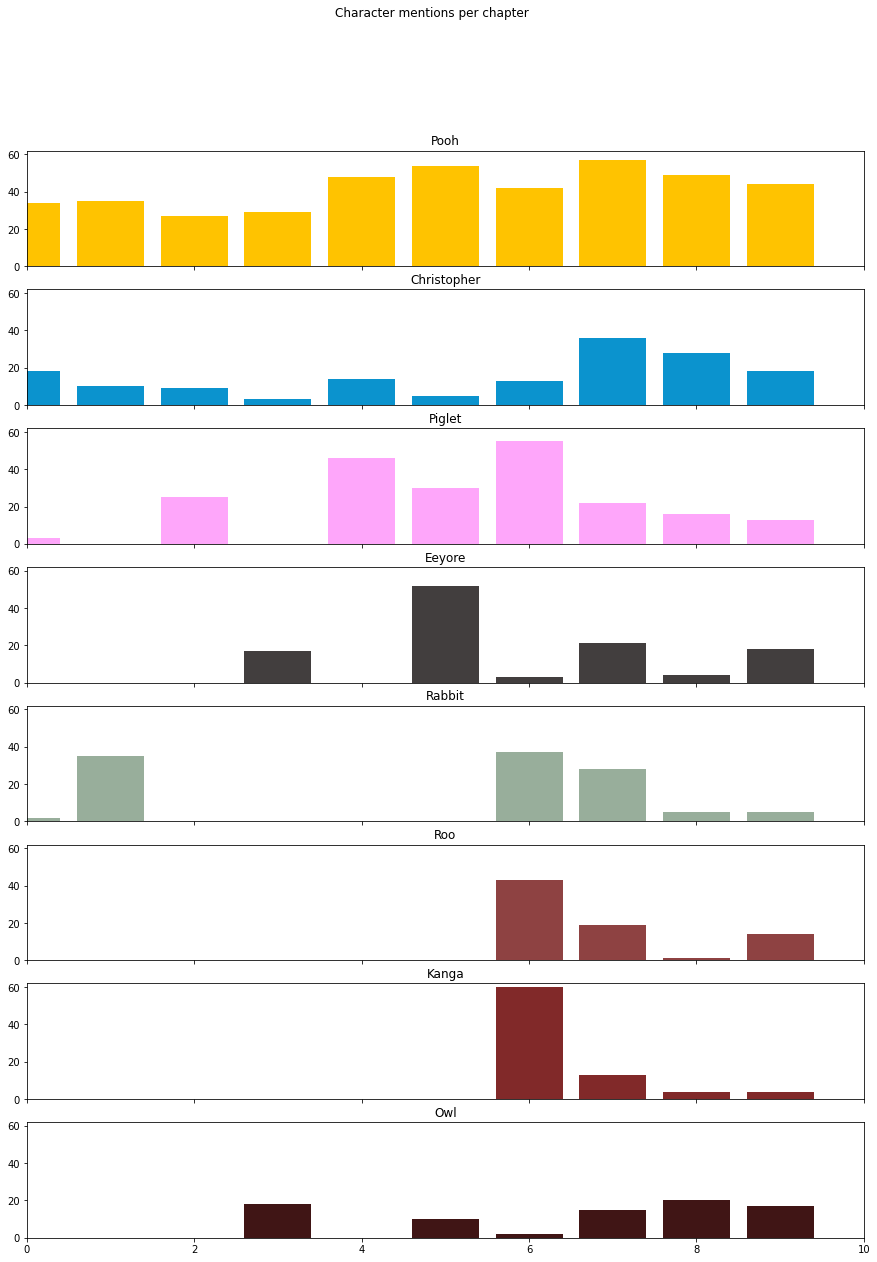

In [21]:
fig, (ax0, ax1, ax2, ax3, ax4, ax5, ax6, ax7) = plt.subplots(8, 1, sharex=True, figsize=(15,20))

x = np.arange(len(char_per_chapter['Pooh']))
limits = [ 0, 10, 0, 62]

ax0.set_title('Pooh')
ax0.axis(limits)
ax0.bar(x, char_per_chapter['Pooh'],color='#FFC300')

ax1.set_title('Christopher')
ax1.axis(limits)
ax1.bar(x, char_per_chapter['Christopher'],color='#0B93CE')

ax2.set_title('Piglet')
ax2.axis(limits)
ax2.bar(x, char_per_chapter['Piglet'],color='#FEA6FA')

ax3.set_title('Eeyore')
ax3.axis(limits)
ax3.bar(x, char_per_chapter['Eeyore'],color='#423E3E')

ax4.set_title('Rabbit')
ax4.axis(limits)
ax4.bar(x, char_per_chapter['Rabbit'],color='#98AE9B')

ax5.set_title('Roo')
ax5.axis(limits)
ax5.bar(x, char_per_chapter['Roo'],color='#8E4242')

ax6.set_title('Kanga')
ax6.axis(limits)
ax6.bar(x, char_per_chapter['Kanga'],color='#812929')

ax7.set_title('Owl')
ax7.axis(limits)
ax7.bar(x, char_per_chapter['Owl'],color='#401515')

plt.suptitle('Character mentions per chapter')
plt.savefig('character_mentions_per_chapter.png')
plt.show()

In [22]:
import re
file2 = open("winnie_the_pooh.txt",'r')

doclist = [ line for line in file2 ]
docstr = '' . join(doclist)
sentences = re.split(r'[.!?]', docstr)
file2.close()

In [23]:
sentences2 = []
for i in range(len(sentences)):
    sentences2.append(Tokenizer.tokenize(sentences[i]))

In [24]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\marci\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [25]:
separator = ' '
sentences2_1 = []
for i in range(len(sentences2)):
        sentences2_1.append(separator.join(sentences2[i]))

In [26]:
sentence_polarity = []

sia = SIA()

for sentence in sentences2_1:
    sentence_polarity.append(sia.polarity_scores(sentence))

In [27]:
sentence_polarity = pd.DataFrame(sentence_polarity)

In [28]:
sentences2_1 = pd.DataFrame(sentences2_1)

In [29]:
joined_df= sentence_polarity.join(sentences2_1, on=sentence_polarity.index)
joined_df = joined_df.rename(columns = {0:'oryginal_sentences'})
joined_df = joined_df.where(~(joined_df.oryginal_sentences==''))
joined_df = joined_df[~joined_df['oryginal_sentences'].isnull()]
joined_df

neg    neu    pos  compound  \
0     0.0  0.726  0.274    0.7506   
1     0.0  0.612  0.388    0.2263   
2     0.0  1.000  0.000    0.0000   
3     0.0  0.588  0.412    0.6369   
4     0.0  1.000  0.000    0.0000   
...   ...    ...    ...       ...   
2250  0.0  1.000  0.000    0.0000   
2251  0.0  0.707  0.293    0.4404   
2252  0.0  1.000  0.000    0.0000   
2253  0.0  1.000  0.000    0.0000   
2256  0.0  1.000  0.000    0.0000   

                                     oryginal_sentences  
0     Winnie-The-Pooh - Introduction To her Hand in ...  
1                                  Say you re surprised  
2                         Say it s just what you wanted  
3              Because it s yours - because we love you  
4     INTRODUCTION IF you happen to have read anothe...  
...                                                 ...  
2250                                     I might I said  
2251        Was Pooh s pencil case any better than mine  
2252                        It was just the same I said  
2253                             He nodded and went out  
2256  and in a moment I heard Winnie-the-Pooh--bump ...  

[2088 rows x 5 columns]

In [30]:
pos = 0
neg = 0
neu = 0
for i in joined_df.index:
    if joined_df.compound[i] > 0:
        pos = pos+1
    if joined_df.compound[i] < 0:
        neg = neg+1
    if joined_df.compound[i] == 0:
        neu = neu+1

In [31]:
pos

603

In [32]:
neg

227

In [33]:
neu

1258

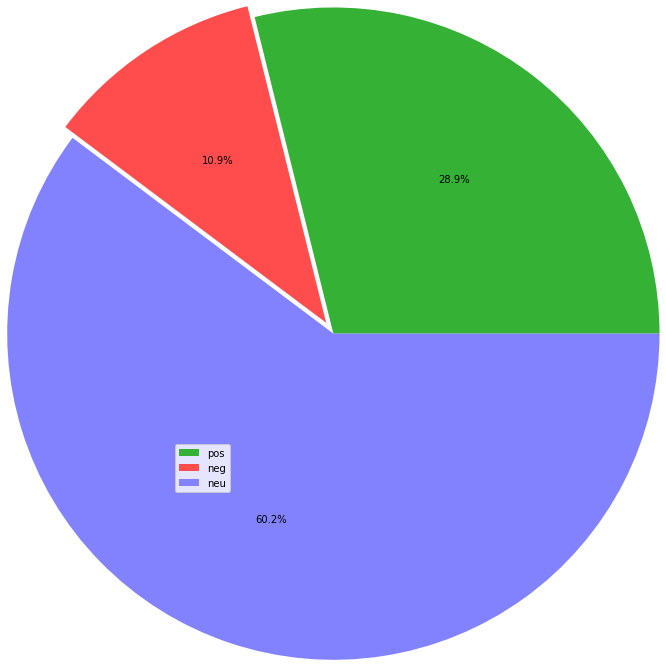

In [34]:
explode = [0,0.1,0]
colors = ['#35b235','#ff4d4d', '#8282ff']
plt.pie([pos,neg,neu], explode=explode, colors=colors, autopct='%1.1f%%', radius=2.5)
plt.legend(['pos','neg','neu'], loc='lower left')

In [35]:
 def clean(text):
    text = re.sub('[^A-Za-z]+', ' ', text)
    return text

joined_df['Cleaned sentences'] = joined_df['oryginal_sentences'].apply(clean)

In [36]:
joined_df

neg    neu    pos  compound  \
0     0.0  0.726  0.274    0.7506   
1     0.0  0.612  0.388    0.2263   
2     0.0  1.000  0.000    0.0000   
3     0.0  0.588  0.412    0.6369   
4     0.0  1.000  0.000    0.0000   
...   ...    ...    ...       ...   
2250  0.0  1.000  0.000    0.0000   
2251  0.0  0.707  0.293    0.4404   
2252  0.0  1.000  0.000    0.0000   
2253  0.0  1.000  0.000    0.0000   
2256  0.0  1.000  0.000    0.0000   

                                     oryginal_sentences  \
0     Winnie-The-Pooh - Introduction To her Hand in ...   
1                                  Say you re surprised   
2                         Say it s just what you wanted   
3              Because it s yours - because we love you   
4     INTRODUCTION IF you happen to have read anothe...   
...                                                 ...   
2250                                     I might I said   
2251        Was Pooh s pencil case any better than mine   
2252                        It was just the same I said   
2253                             He nodded and went out   
2256  and in a moment I heard Winnie-the-Pooh--bump ...   

                                      Cleaned sentences  
0     Winnie The Pooh Introduction To her Hand in ha...  
1                                  Say you re surprised  
2                         Say it s just what you wanted  
3                Because it s yours because we love you  
4     INTRODUCTION IF you happen to have read anothe...  
...                                                 ...  
2250                                     I might I said  
2251        Was Pooh s pencil case any better than mine  
2252                        It was just the same I said  
2253                             He nodded and went out  
2256  and in a moment I heard Winnie the Pooh bump b...  

[2088 rows x 6 columns]

In [41]:
 pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
            newlist.append(tuple([word, pos_dict.get(tag[0])]))
    return newlist

joined_df['POS tagged'] = joined_df['Cleaned sentences'].apply(token_stop_pos)

In [42]:
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
        if not pos:
            lemma = word
            lemma_rew = lemma_rew + " " + lemma
        else:
            lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
            lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

joined_df['Lemma'] = joined_df['POS tagged'].apply(lemmatize)

In [43]:
pos_sent = list(joined_df[joined_df.compound > 0].Lemma)
pos_words = []
for i in range(len(pos_sent)):
    sep_pos = Tokenizer.tokenize(pos_sent[i])
    for j in range(len(sep_pos)):
        pos_words.append(sep_pos[j])
import collections
counter_pos=collections.Counter(pos_words)
sorted_x = sorted(counter_pos.items(), key=lambda kv: kv[1])
sorted_dict = collections.OrderedDict(sorted_x)
sorted_dict_list = list(sorted_dict.keys())
sorted_dict_list[-20:]

['good',
 'could',
 'Owl',
 'get',
 'Yes',
 'Bear',
 'know',
 'come',
 'would',
 'Well',
 'look',
 'Rabbit',
 'think',
 'Christopher',
 'Robin',
 'go',
 'like',
 'Piglet',
 'Pooh',
 'say']

In [44]:
neg_sent = list(joined_df[joined_df.compound < 0].Lemma)
neg_words = []
for i in range(len(neg_sent)):
    neg_pos = Tokenizer.tokenize(neg_sent[i])
    for j in range(len(neg_pos)):
        neg_words.append(neg_pos[j])
import collections
counter_neg=collections.Counter(neg_words)
sorted_x_neg = sorted(counter_neg.items(), key=lambda kv: kv[1])
sorted_dict_neg = collections.OrderedDict(sorted_x_neg)
sorted_dict_list_neg = list(sorted_dict_neg.keys())
sorted_dict_list_neg[-20:]

['see',
 'Roo',
 'know',
 'would',
 'cry',
 'little',
 'round',
 'go',
 'time',
 'come',
 'Rabbit',
 'look',
 'get',
 'think',
 'Christopher',
 'Robin',
 'Eeyore',
 'Piglet',
 'Pooh',
 'say']

In [45]:
neu_sent = list(joined_df[joined_df.compound == 0].Lemma)
neu_words = []
for i in range(len(neg_sent)):
    neu_pos = Tokenizer.tokenize(neu_sent[i])
    for j in range(len(neu_pos)):
        neu_words.append(neu_pos[j])
import collections
counter_neu=collections.Counter(neu_words)
sorted_x_neu = sorted(counter_neu.items(), key=lambda kv: kv[1])
sorted_dict_neu = collections.OrderedDict(sorted_x_neu)
sorted_dict_list_neu = list(sorted_dict_neu.keys())
sorted_dict_list_neu[-20:]

['Piglet',
 'paw',
 'front',
 'come',
 'time',
 'door',
 'climb',
 'balloon',
 'little',
 'call',
 'go',
 'ask',
 'get',
 'Rabbit',
 'Winnie',
 'Christopher',
 'Robin',
 'think',
 'Pooh',
 'say']

In [46]:
pos_sent = list(joined_df[joined_df.compound > 0].Lemma)
pos_words = []
for i in range(len(pos_sent)):
    sep_pos = Tokenizer.tokenize(pos_sent[i])
    for j in range(len(sep_pos)):
        pos_words.append(sep_pos[j])
import collections
counter_pos=collections.Counter(pos_words)
sorted_x = sorted(counter_pos.items(), key=lambda kv: kv[1])
sorted_dict = collections.OrderedDict(sorted_x)
sorted_dict_list = list(sorted_dict.keys())
sorted_dict_list[-20:]

['good',
 'could',
 'Owl',
 'get',
 'Yes',
 'Bear',
 'know',
 'come',
 'would',
 'Well',
 'look',
 'Rabbit',
 'think',
 'Christopher',
 'Robin',
 'go',
 'like',
 'Piglet',
 'Pooh',
 'say']

In [47]:
def plot_cloud(wordcloud):
    plt.figure(figsize=(20, 15))
    plt.imshow(wordcloud) 
    plt.axis("off");

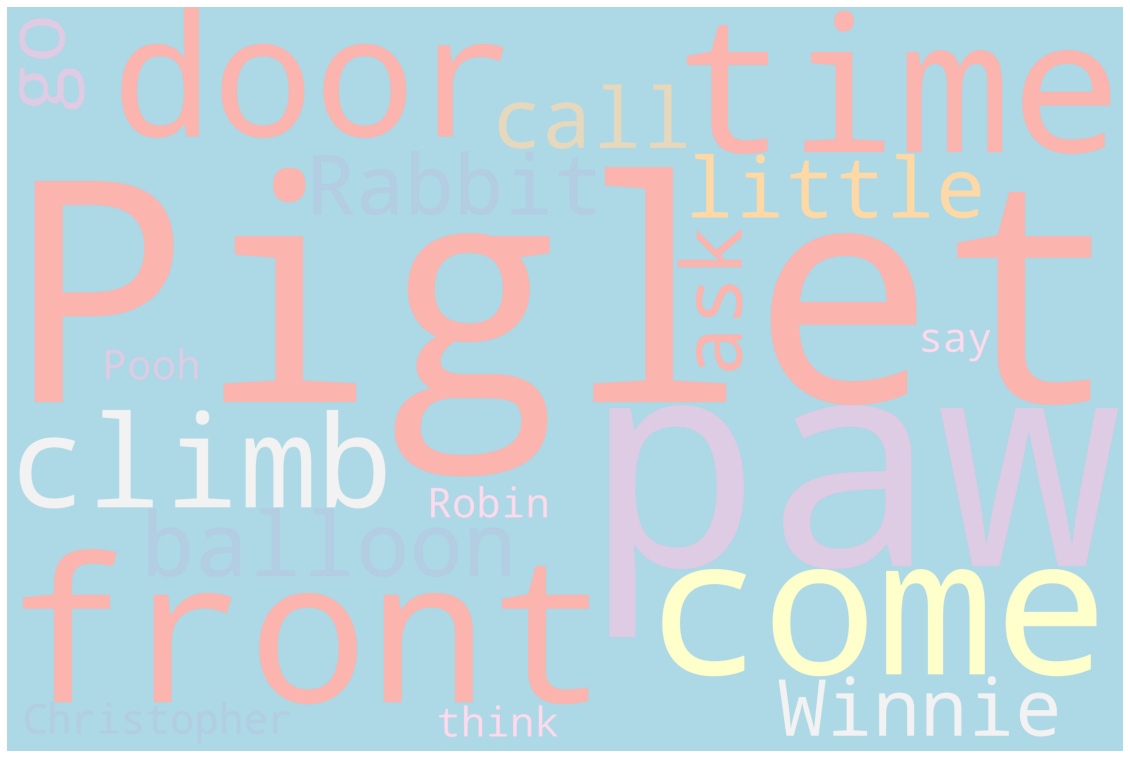

In [48]:
separator = " "
text = separator.join(sorted_dict_list_neu[-20:])
from wordcloud import WordCloud, STOPWORDS
wordcloud = WordCloud(width= 3000, height = 2000, random_state=1, background_color='lightblue', colormap='Pastel1', collocations=False, stopwords = STOPWORDS).generate(text)
plot_cloud(wordcloud)

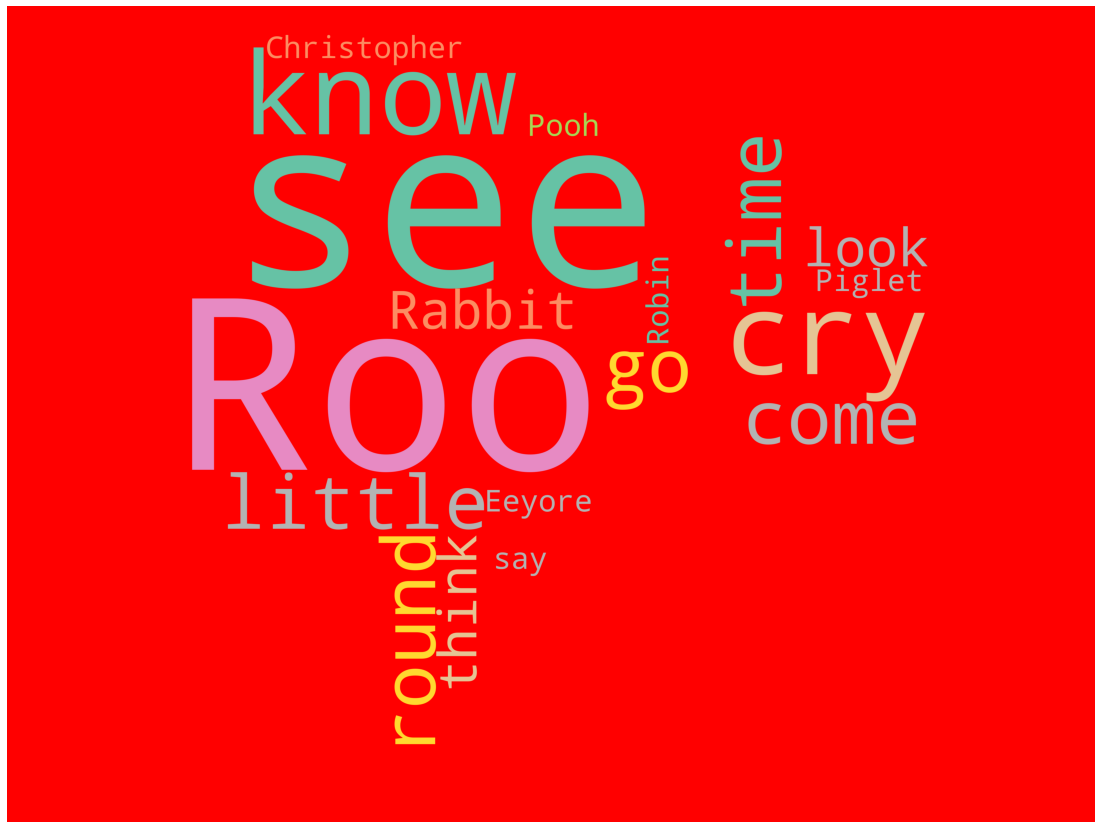

In [49]:
separator = " "
text = separator.join(sorted_dict_list_neg[-20:])
import numpy as np
from PIL import Image
mask = np.array(Image.open('downvote.png'))
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='red', colormap='Set2', collocations=False, stopwords = STOPWORDS, mask=mask).generate(text)
plot_cloud(wordcloud)

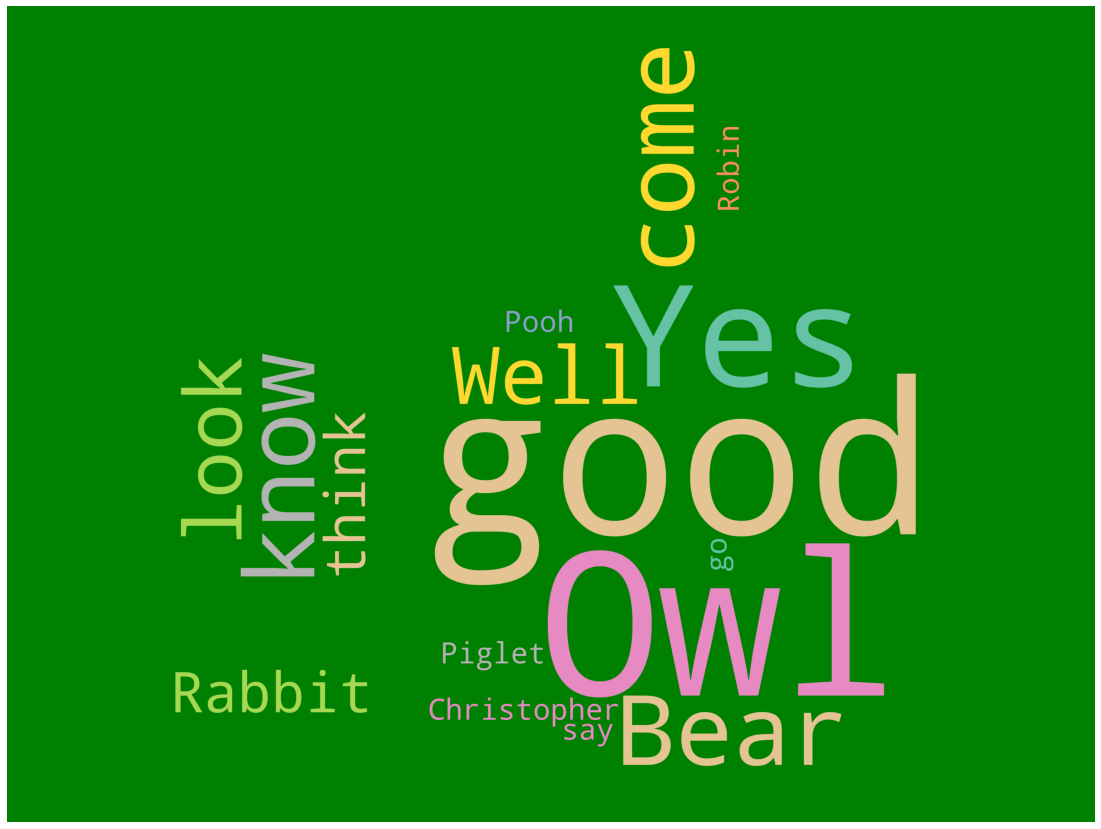

In [50]:
separator = " "
text = separator.join(sorted_dict_list[-20:])
import numpy as np
from PIL import Image
mask = np.array(Image.open('upvote.png'))
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='green', colormap='Set2', collocations=False, stopwords = STOPWORDS, mask=mask).generate(text)
plot_cloud(wordcloud)